In [1]:
import numpy as np
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

# Load data
data = np.load("C:\\Users\\user\\AI\\yaleExtB_data.npy")
target = np.load("C:\\Users\\user\\AI\\yaleExtB_target.npy")

# Reshape data to (66, 79) by truncating last few elements
data = data[:, :5214].reshape(-1, 66, 79)

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

C:\Python-3.10.5\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


((1200, 66, 79), (300, 66, 79))

In [2]:
X_train=X_train.reshape(-1,66,79,1)
X_test=X_test.reshape(-1,66,79,1)
X_train.shape, X_test.shape

((1200, 66, 79, 1), (300, 66, 79, 1))

In [3]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.
X_test = X_test / 255.

In [4]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(Y_train)
test_Y_one_hot = to_categorical(Y_test)

# Display the change for category label using one-hot encoding
print('Original label:', Y_train[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9.0
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [5]:
from sklearn.model_selection import train_test_split
X_train,valid_X,train_label,valid_label = train_test_split(X_train, train_Y_one_hot, test_size=0.2, random_state=42)
X_train.shape,valid_X.shape,train_label.shape,valid_label.shape


((960, 66, 79, 1), (240, 66, 79, 1), (960, 40), (240, 40))

In [6]:
import keras
from keras.models import Sequential,Model
from keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU

In [7]:
batch_size = 64
epochs = 20
num_classes = 40

In [8]:
face_model = Sequential()
face_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(66,79,1),padding='same'))
face_model.add(LeakyReLU(alpha=0.1))
face_model.add(MaxPooling2D((2, 2),padding='same'))
face_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
face_model.add(LeakyReLU(alpha=0.1))
face_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
face_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
face_model.add(LeakyReLU(alpha=0.1))
face_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
face_model.add(Flatten())
face_model.add(Dense(128, activation='linear'))
face_model.add(LeakyReLU(alpha=0.1))
face_model.add(Dense(num_classes, activation='softmax'))

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [9]:
face_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [10]:
face_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 66, 79, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 66, 79, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 33, 40, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 33, 40, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 33, 40, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 17, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 17, 20, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 17, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 9, 10, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 11520)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,474,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 40)                  │           5,160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,572,520 (6.00 MB)

 Trainable params: 1,572,520 (6.00 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
face_train = face_model.fit(X_train, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 177ms/step - accuracy: 0.0264 - loss: 3.5907 - val_accuracy: 0.0583 - val_loss: 3.4629
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - accuracy: 0.0687 - loss: 3.3426 - val_accuracy: 0.1000 - val_loss: 3.2740
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - accuracy: 0.1603 - loss: 3.0426 - val_accuracy: 0.2292 - val_loss: 2.6551
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - accuracy: 0.3789 - loss: 2.2208 - val_accuracy: 0.5083 - val_loss: 1.8016
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - accuracy: 0.6740 - loss: 1.2504 - val_accuracy: 0.6792 - val_loss: 1.0905
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 177ms/step - accuracy: 0.7975 - loss: 0.6246 - val_accuracy: 0.7875 - val_loss: 0.7805
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - accuracy: 0.8975 - loss: 0.3643 - val_accuracy: 0.8292 - val_loss: 0.6247
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - accuracy: 0.9489 - loss: 0.1968 - val_accuracy: 0.

In [13]:
test_eval = face_model.evaluate(X_test, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.36679914593696594
Test accuracy: 0.9166666865348816


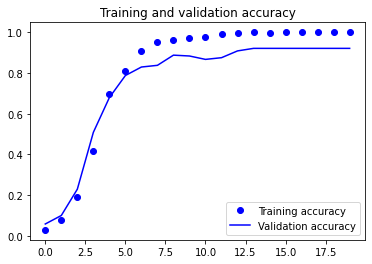

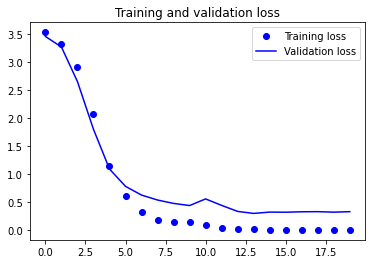

In [14]:
accuracy = face_train.history['accuracy']
val_accuracy = face_train.history['val_accuracy']
loss = face_train.history['loss']
val_loss = face_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [15]:
batch_size = 64
epochs = 20
num_classes = 40

In [16]:
face_model = Sequential()
face_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(66,79,1)))
face_model.add(LeakyReLU(alpha=0.1))
face_model.add(MaxPooling2D((2, 2),padding='same'))
face_model.add(Dropout(0.25))
face_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
face_model.add(LeakyReLU(alpha=0.1))
face_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
face_model.add(Dropout(0.25))
face_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
face_model.add(LeakyReLU(alpha=0.1))
face_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
face_model.add(Dropout(0.4))
face_model.add(Flatten())
face_model.add(Dense(128, activation='linear'))
face_model.add(LeakyReLU(alpha=0.1))
face_model.add(Dropout(0.3))
face_model.add(Dense(num_classes, activation='softmax'))

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [17]:
face_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 66, 79, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 66, 79, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 33, 40, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 33, 40, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 33, 40, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 33, 40, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 17, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 17, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 17, 20, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 17, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 9, 10, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 9, 10, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 11520)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,474,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 40)                  │           5,160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,572,520 (6.00 MB)

 Trainable params: 1,572,520 (6.00 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
face_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [19]:
face_train_dropout = face_model.fit(X_train, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 176ms/step - accuracy: 0.0350 - loss: 3.6349 - val_accuracy: 0.0750 - val_loss: 3.5756
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - accuracy: 0.0458 - loss: 3.5097 - val_accuracy: 0.0292 - val_loss: 3.5214
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - accuracy: 0.0511 - loss: 3.4079 - val_accuracy: 0.0542 - val_loss: 3.4535
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 184ms/step - accuracy: 0.0533 - loss: 3.3526 - val_accuracy: 0.1750 - val_loss: 3.2547
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 186ms/step - accuracy: 0.1559 - loss: 3.0792 - val_accuracy: 0.2458 - val_loss: 2.8571
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - accuracy: 0.2798 - loss: 2.5680 - val_accuracy: 0.4542 - val_loss: 2.0933
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 201ms/step - accuracy: 0.4544 - loss: 1.8956 - val_accuracy: 0.6375 - val_loss: 1.4116
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 169ms/step - accuracy: 0.6211 - loss: 1.2662 - val_accuracy: 0.

In [20]:
test_eval = face_model.evaluate(X_test, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9505 - loss: 0.1647
Test loss: 0.19579778611660004
Test accuracy: 0.9433333277702332


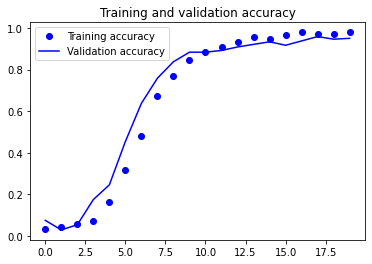

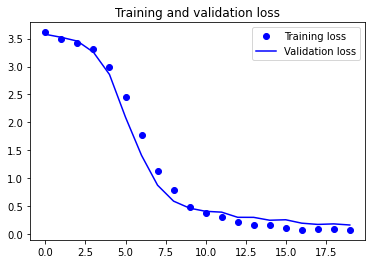

In [21]:
accuracy = face_train_dropout.history['accuracy']
val_accuracy = face_train_dropout.history['val_accuracy']
loss = face_train_dropout.history['loss']
val_loss = face_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()